NAME:Komal Chitnis

Roll No:26

Moodle ID:20102068

BE COMPS DIV A

#                                 **EXPERIMENT NO 4:LOGISTIC REGRESSION**





In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML DATASET/BankDataset.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

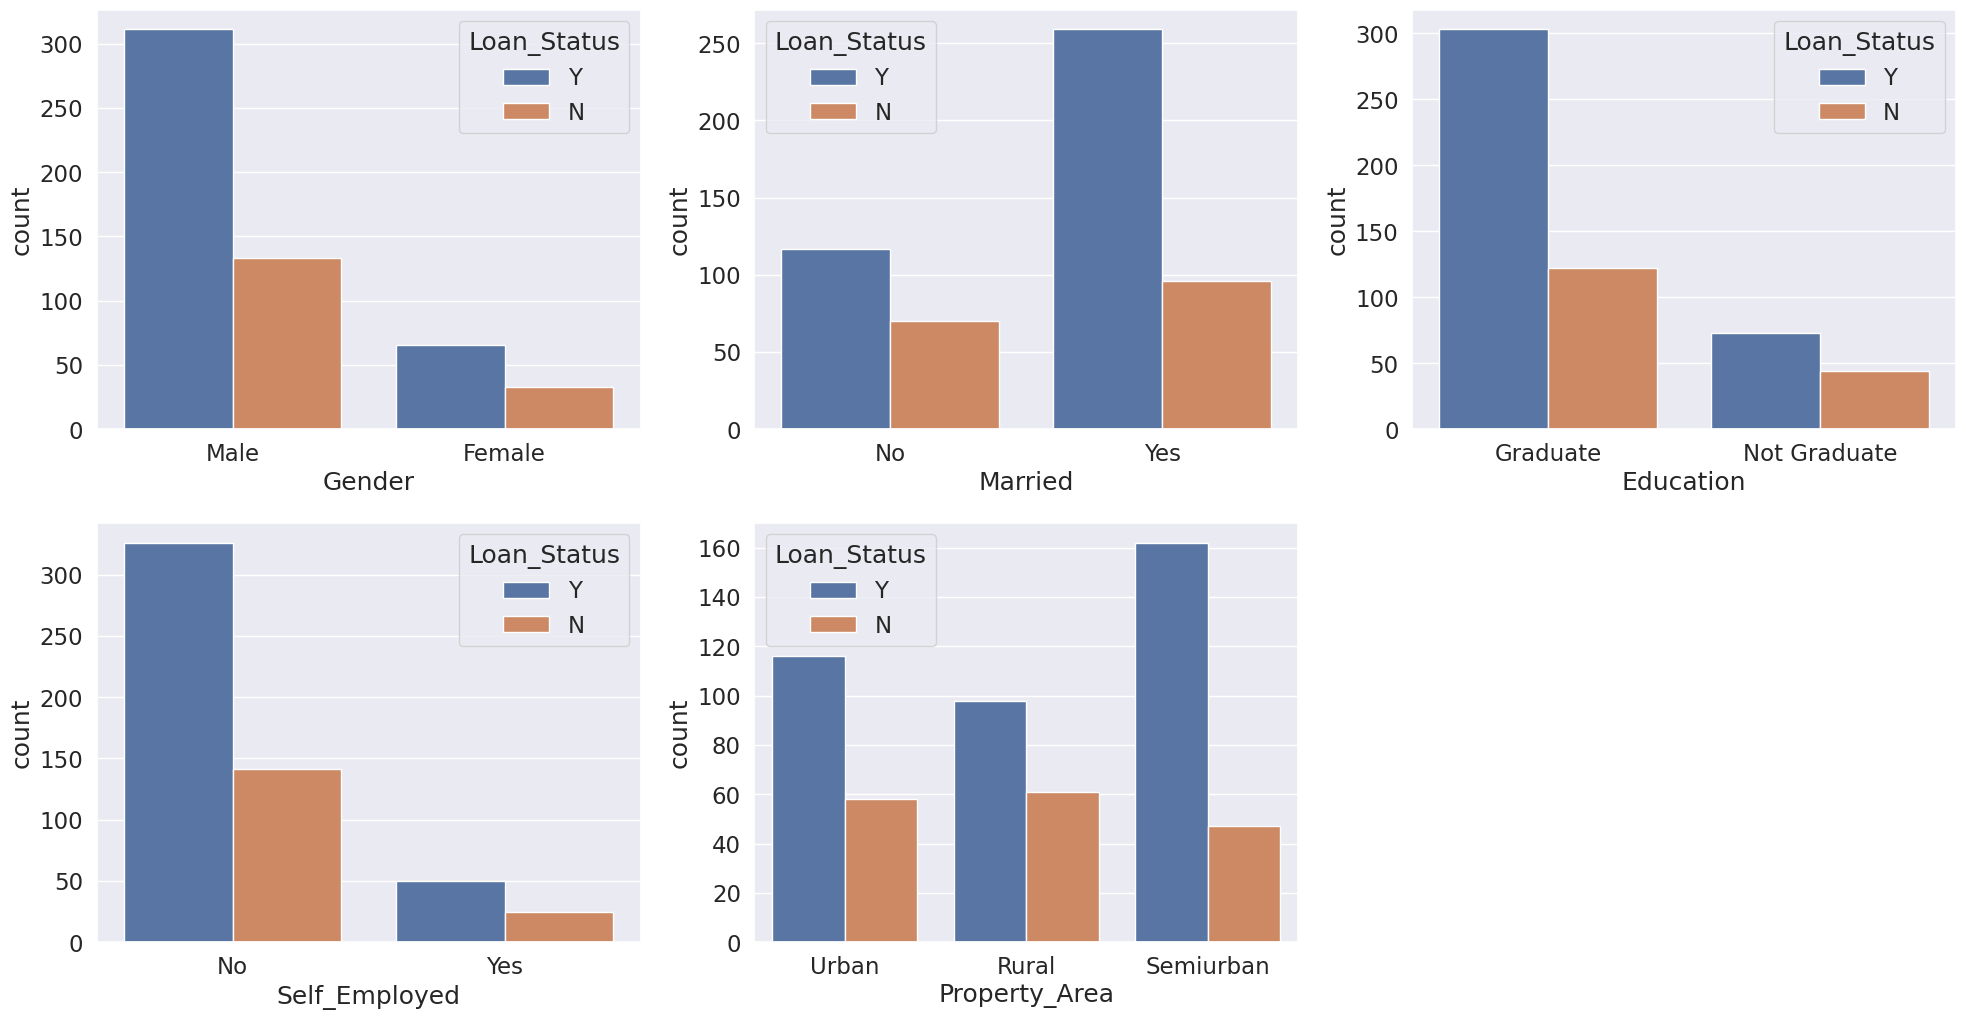

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

plt.subplot(3, 3, 1)
sns.countplot(x=df['Gender'], hue=df['Loan_Status'])

plt.subplot(3, 3, 2)
sns.countplot(x=df['Married'], hue=df['Loan_Status'])

plt.subplot(3, 3, 3)
sns.countplot(x=df['Education'], hue=df['Loan_Status'])

plt.subplot(3, 3, 4)
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'])

plt.subplot(3, 3, 5)
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'])

plt.tight_layout()
plt.show()

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [ ]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [ ]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
x=df.iloc[1:542,1:12].values

In [ ]:
y=df.iloc[1:542,12].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_prediction=model.predict(x_test)

In [ ]:
lr_prediction

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
print("y_predicted",lr_prediction)
print("y_actual",y_test)

y_predicted [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_actual [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


In [ ]:
print("Logistics Regresion Accuracy =",metrics.accuracy_score(lr_prediction,y_test))

Logistics Regresion Accuracy = 0.7914110429447853
